In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics
from evaluation.classification.statistics import get_precisions

In [2]:
resnet50_not_pretrain_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_not_pretrain")
resnet50_freeze_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_freeze")
resnet50_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806")
resnet50_all67_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_All6to7")
resnet50_AugScale_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_aug_scale")
resnet50_all67_AugScale_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_All6to7_aug_scale")
resnet50_all67withResize_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_All6to7withResize")
#resnet50_all67withResize_FC_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_All6to7withResize_concat")
#resnet50_all67withResize_Labelsmooth_root_path = pj(os.getcwd(), "figure/classification/master_paper/resnet50/b20_lr1e-5/crossvalid_20200806_All6to7withResize_manual")

### Average Precision

In [3]:
resnet50_not_pretrain = pd.read_csv(pj(resnet50_not_pretrain_root_path, "validation_matrix.csv"))
resnet50_freeze = pd.read_csv(pj(resnet50_freeze_root_path, "validation_matrix.csv"))
resnet50 = pd.read_csv(pj(resnet50_root_path, "validation_matrix.csv"))
resnet50_all67 = pd.read_csv(pj(resnet50_all67_root_path, "validation_matrix.csv"))
resnet50_AugScale = pd.read_csv(pj(resnet50_AugScale_root_path, "validation_matrix.csv"))
resnet50_all67_AugScale = pd.read_csv(pj(resnet50_all67_AugScale_root_path, "validation_matrix.csv"))
resnet50_all67withResize = pd.read_csv(pj(resnet50_all67withResize_root_path, "validation_matrix.csv"))
#resnet50_all67withResize_FC = pd.read_csv(pj(resnet50_all67withResize_FC_root_path, "validation_matrix.csv"))
#resnet50_all67withResize_Labelsmooth = pd.read_csv(pj(resnet50_all67withResize_Labelsmooth_root_path, "validation_matrix.csv"))

In [4]:
exp_df = [resnet50_not_pretrain,
          resnet50_freeze,
          resnet50,
          resnet50_all67,
          resnet50_AugScale,
          resnet50_all67_AugScale,
          resnet50_all67withResize
         ]
exp_name = ["resnet50_not_pretrain", 
            "resnet50_freeze", 
            "resnet50", 
            "resnet50_all67", 
            "resnet50_AugScale", 
            "resnet50_all67_AugScale", 
            "resnet50_all67withResize", 
           ]
exp_precision = [get_precisions(elem_df) for elem_df in exp_df]
exp_ap = [elem_precision.mean() for elem_precision in exp_precision]

In [5]:
df = pd.DataFrame({"AP": exp_ap})
df.index = exp_name
df

,AP
resnet50_not_pretrain,0.540260
resnet50_freeze,0.659940
resnet50,0.837902
resnet50_all67,0.903058
resnet50_AugScale,0.876038
resnet50_all67_AugScale,0.899277
resnet50_all67withResize,0.913583


### Precision

In [6]:
insect_names = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [7]:
data_dict = {}
for name, precision in zip(exp_name, exp_precision):
    data_dict.update({name: precision})

In [8]:
df = pd.DataFrame(data_dict)
df.index = insect_names
df

,resnet50_not_pretrain,resnet50_freeze,resnet50,resnet50_all67,resnet50_AugScale,resnet50_all67_AugScale,resnet50_all67withResize
Diptera,0.657426,0.738614,0.904950,0.950495,0.918812,0.952475,0.958416
Ephemeridae,0.608392,0.853147,0.825175,0.916084,0.867133,0.895105,0.930070
Ephemeroptera,0.266212,0.484642,0.686007,0.819113,0.778157,0.825939,0.846416
Lepidoptera,0.826194,0.785832,0.942339,0.948929,0.948105,0.939044,0.944811
Plecoptera,0.517241,0.527383,0.845842,0.918864,0.874239,0.898580,0.914807
Trichoptera,0.366093,0.570025,0.823096,0.864865,0.869779,0.884521,0.886978


### Error Analysis

### --- size distribution and Average Precision ---

In [9]:
each_size_df = pd.read_csv(pj(resnet50_not_pretrain_root_path, "each_size_df.csv"))
each_size_df["exponent"] = each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(each_size_df["exponent"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"exponent": idx, "count": count})
insect_size_df = insect_size_df.drop(insect_size_df.index[[0, 1]])
insect_size_df

,exponent,count
2,7.0,12
3,8.0,51
4,9.0,131
5,10.0,403
6,11.0,1004
7,12.0,740
8,13.0,431
9,14.0,260
10,15.0,21


In [10]:
resnet50_not_pretrain = pd.read_csv(pj(resnet50_not_pretrain_root_path, "all_size_df.csv"))
resnet50_freeze = pd.read_csv(pj(resnet50_freeze_root_path, "all_size_df.csv"))
resnet50 = pd.read_csv(pj(resnet50_root_path, "all_size_df.csv"))
resnet50_all67 = pd.read_csv(pj(resnet50_all67_root_path, "all_size_df.csv"))
resnet50_AugScale = pd.read_csv(pj(resnet50_AugScale_root_path, "all_size_df.csv"))
resnet50_all67_AugScale = pd.read_csv(pj(resnet50_all67_AugScale_root_path, "all_size_df.csv"))
resnet50_all67withResize = pd.read_csv(pj(resnet50_all67withResize_root_path, "all_size_df.csv"))
#resnet50_all67withResize_FC = pd.read_csv(pj(resnet50_all67withResize_FC_root_path, "all_size_df.csv"))
#resnet50_all67withResize_Labelsmooth = pd.read_csv(pj(resnet50_all67withResize_Labelsmooth_root_path, "all_size_df.csv"))

In [11]:
exp_df = [resnet50_not_pretrain,
          resnet50_freeze,
          resnet50,
          resnet50_all67,
          resnet50_AugScale,
          resnet50_all67_AugScale,
          resnet50_all67withResize
         ]
exp_each_size_ap = [elem_df.drop(elem_df.index[[0, 1]]) for elem_df in exp_df]

In [12]:
data_dict = {
    "exponent": insect_size_df["exponent"],
    "count": insect_size_df["count"],
}
for name, each_size_ap in zip(exp_name, exp_each_size_ap):
    data_dict.update({name: each_size_ap["Accuracy"]})

In [13]:
df = pd.DataFrame(data_dict)
df

,exponent,count,resnet50_not_pretrain,resnet50_freeze,resnet50,resnet50_all67,resnet50_AugScale,resnet50_all67_AugScale,resnet50_all67withResize
2,7.0,12,1.000000,1.000000,1.000000,1.000000,1.000000,0.916667,1.000000
3,8.0,51,0.725490,0.784314,0.901961,0.882353,0.823529,0.862745,0.843137
4,9.0,131,0.450382,0.503817,0.763359,0.862595,0.824427,0.770992,0.839695
5,10.0,403,0.339950,0.461538,0.761787,0.841191,0.791563,0.828784,0.866005
6,11.0,1004,0.557769,0.627490,0.852590,0.901394,0.885458,0.906375,0.911355
7,12.0,740,0.704054,0.762162,0.913514,0.939189,0.936486,0.943243,0.941892
8,13.0,431,0.777262,0.812065,0.941995,0.979118,0.965197,0.972158,0.976798
9,14.0,260,0.869231,0.838462,0.969231,0.992308,0.973077,0.988462,0.988462
10,15.0,21,0.809524,0.809524,0.809524,0.904762,0.952381,0.952381,0.952381


### (1) Compare Transfer Learning

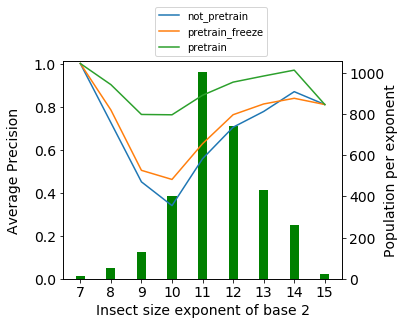

In [14]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7", "8", "9", "10", "11", "12", "13", "14", "15"]

ax1.bar(x_label, df["count"], width=0.3, color="g")
ax2.plot(x_label, df["resnet50_not_pretrain"], label="not_pretrain")
ax2.plot(x_label, df["resnet50_freeze"], label="pretrain_freeze")
ax2.plot(x_label, df["resnet50"], label="pretrain")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.75, 1.0), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect size exponent of base 2")
ax1.set_ylabel("Average Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent")
ax2.set_ylim(0., 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/classification/compare_method/comp_TL_from_size_dist.png", bbox_inches="tight")

### (2) Compare Augmentation

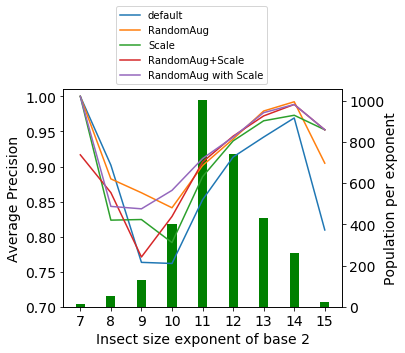

In [15]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7", "8", "9", "10", "11", "12", "13", "14", "15"]

ax1.bar(x_label, df["count"], width=0.3, color="g")
ax2.plot(x_label, df["resnet50"], label="default")
ax2.plot(x_label, df["resnet50_all67"], label="RandomAug")
ax2.plot(x_label, df["resnet50_AugScale"], label="Scale")
ax2.plot(x_label, df["resnet50_all67_AugScale"], label="RandomAug+Scale")
ax2.plot(x_label, df["resnet50_all67withResize"], label="RandomAug with Scale")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.75, 1.0), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect size exponent of base 2")
ax1.set_ylabel("Average Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per exponent")
ax2.set_ylim(0.7, 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/master_paper/classification/compare_method/comp_Aug_from_size_dist.png", bbox_inches="tight")